In [1]:
# Qsurface imports
from qsurface.main import create_phenomenological_toric_superoperator, create_phenomenological_weight_3_toric_superoperator,create_phenomenological_weight_4_toric_superoperator, initialize, run, BenchmarkDecoder, run_multiprocess_superoperator


# Interactive plotting imports
from bokeh.plotting import figure, show
from bokeh.models import Label
from bokeh.util.compiler import TypeScript

# Plotting imports
import matplotlib.pyplot as plt

# Math imports
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import math

# Utilities import
from os import listdir
from os.path import isfile, join
from itertools import permutations
import timeit
import time


%load_ext line_profiler

# Weight 3 protocols

In [2]:
def plot(data, iterations, name):
    iterations = 20000

    rates = [rate[0] for rate in list(data["(6, 6)"].values())]

    l6 = [rate[1] for rate in list(data["(6, 6)"].values())]
    l8 = [rate[1] for rate in list(data["(8, 8)"].values())]
    l10 = [rate[1] for rate in list(data["(10, 10)"].values())]
    l12 = [rate[1] for rate in list(data["(12, 12)"].values())]


    # Fitting function
    def fitting_function(x, a0, a1, a2, mu, pth):
        return a0+a1*(x-pth)*(8**(1/mu))+a2*((x-pth)**2)*(8**(2/mu))

    # Error function
    def err(x):
        return math.sqrt((x**2 * (1-x) + x * (1-x)**2 )/iterations)


    error= [[err(x) for x in l] for l in [l6, l8,  l10, l12]]

    rng = np.random.default_rng()

    # pop =[curve_fit(fitting_function, rates, code, maxfev=35000) for code in [l6, l8, l10, l12]]


    fig = plt.figure(figsize=(10,5))
    fig.set_facecolor("w")
    ax1 = fig.add_subplot()
    ax1.set_title(f'Threshold weight-3 {name} with {iterations} iterations')
    ax1.set_ylabel('Decoding success rate')
    ax1.set_xlabel('Gate error = measurement error = p')
    plt.grid()


    plt.errorbar(rates,l6,yerr=error[0], fmt='k.')
    plt.errorbar(rates,l8,yerr=error[1], fmt='k.')
    plt.errorbar(rates,l10,yerr=error[2], fmt='k.')
    plt.errorbar(rates,l12,yerr=error[3], fmt='k.')


    # plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[0][0][0],pop[0][0][1],pop[0][0][2],pop[0][0][3],pop[0][0][4]),'g-', label='l6_fit')
    # plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[1][0][0],pop[1][0][1],pop[1][0][2],pop[1][0][3],pop[1][0][4]),'b-', label='l8_fit')
    # plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[2][0][0],pop[2][0][1],pop[2][0][2],pop[2][0][3],pop[2][0][4]),'c-', label='l10_fit')
    # plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[3][0][0],pop[3][0][1],pop[3][0][2],pop[3][0][3],pop[3][0][4]),'m-', label='l12_fit')

    plt.plot(rates,l6,'g-', label='l6_fit')
    plt.plot(rates,l8,'b-', label='l8_fit')
    plt.plot(rates,l10,'c-', label='l10_fit')
    plt.plot(rates,l12,'m-', label='l12_fit')


    plt.legend(['6 X 6', '8 X 8','10 X 10','12 X 12', 'error bars'])

    plt.savefig(f'Weight_{name}_threshold.pdf')
    plt.show()

## hc weight-3

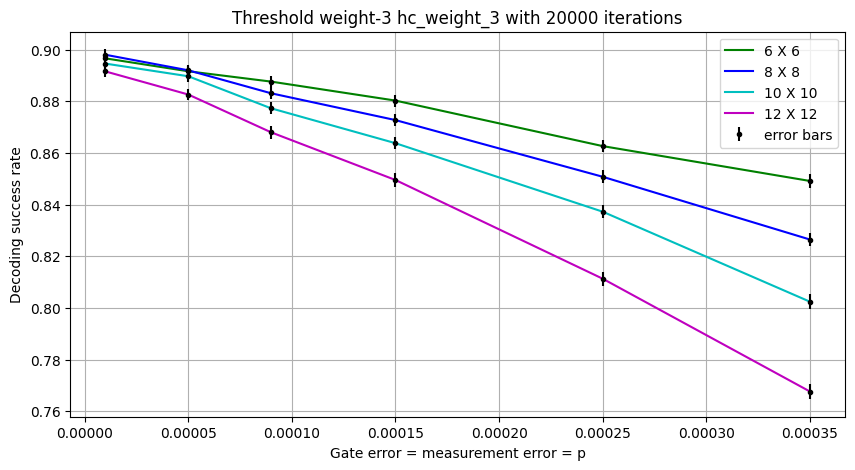

In [12]:
# prot_data = {"(6, 6)":{"0":[0.0005,0.8245],"1":[0.00065,0.79405],"2":[0.0008,0.8102],"3":[0.00095,0.73225],"4":[0.0011,0.7082]},"(8, 8)":{"0":[0.0005,0.7896],"1":[0.00065,0.75305],"2":[0.0008,0.78115],"3":[0.00095,0.67385],"4":[0.0011,0.62115]},"(10, 10)":{"0":[0.0005,0.7543],"1":[0.00065,0.7067],"2":[0.0008,0.7292],"3":[0.00095,0.59225],"4":[0.0011,0.5395]},"(12, 12)":{"0":[0.0005,0.7117],"1":[0.00065,0.64715],"2":[0.0008,0.67955],"3":[0.00095,0.5082],"4":[0.0011,0.4477]}}
prot_data = {"(6, 6)":{"0":[0.00001,0.89665],"1":[0.00005,0.89165],"2":[0.00009,0.88765],"3":[0.00015,0.8803],"4":[0.00025,0.862675],"5":[0.00035,0.849175]},"(8, 8)":{"0":[0.00001,0.89805],"1":[0.00005,0.892025],"2":[0.00009,0.883125],"3":[0.00015,0.87275],"4":[0.00025,0.8508],"5":[0.00035,0.8265]},"(10, 10)":{"0":[0.00001,0.894625],"1":[0.00005,0.889725],"2":[0.00009,0.8773],"3":[0.00015,0.8638],"4":[0.00025,0.837275],"5":[0.00035,0.802425]},"(12, 12)":{"0":[0.00001,0.8916],"1":[0.00005,0.88265],"2":[0.00009,0.868],"3":[0.00015,0.84955],"4":[0.00025,0.811325],"5":[0.00035,0.76765]}}
iters = 30000
prot_name = "hc_weight_3"
plot(prot_data,iters,prot_name)

## dyn_prot_simv4_sIIIe_3_5_1

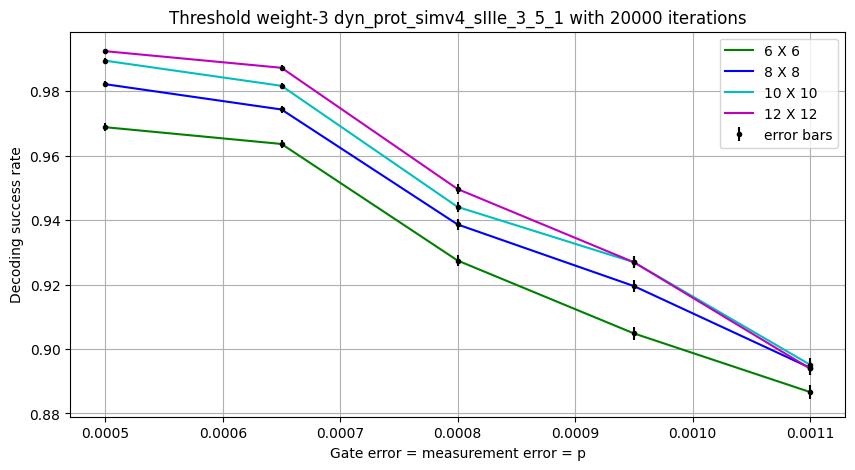

In [11]:
prot_data = {"(6, 6)":{"0":[0.0005,0.96885],"1":[0.00065,0.96365],"2":[0.0008,0.92745],"3":[0.00095,0.90485],"4":[0.0011,0.88665]},"(8, 8)":{"0":[0.0005,0.9822],"1":[0.00065,0.97435],"2":[0.0008,0.93865],"3":[0.00095,0.91955],"4":[0.0011,0.8942]},"(10, 10)":{"0":[0.0005,0.9895],"1":[0.00065,0.9817],"2":[0.0008,0.9441],"3":[0.00095,0.92695],"4":[0.0011,0.89515]},"(12, 12)":{"0":[0.0005,0.99245],"1":[0.00065,0.9873],"2":[0.0008,0.94965],"3":[0.00095,0.92695],"4":[0.0011,0.89395]}}
# prot_data = {"(6, 6)":{"0":[0.0012,0.8751],"1":[0.0013,0.8582],"2":[0.0014,0.848275],"3":[0.0016,0.8175],"4":[0.0017,0.79625],"5":[0.0018,0.7952]},"(8, 8)":{"0":[0.0012,0.877325],"1":[0.0013,0.863225],"2":[0.0014,0.835925],"3":[0.0016,0.79435],"4":[0.0017,0.767425],"5":[0.0018,0.76345]},"(10, 10)":{"0":[0.0012,0.87785],"1":[0.0013,0.854725],"2":[0.0014,0.8299],"3":[0.0016,0.767075],"4":[0.0017,0.7378],"5":[0.0018,0.731675]},"(12, 12)":{"0":[0.0012,0.8712],"1":[0.0013,0.849275],"2":[0.0014,0.81455],"3":[0.0016,0.7446],"4":[0.0017,0.6977],"5":[0.0018,0.6901]}}
# prot_data = {"(6, 6)":{"0":[0.001,0.892375],"1":[0.00105,0.8852],"2":[0.0011,0.87885],"3":[0.001105,0.88065],"4":[0.0012,0.867675],"5":[0.001205,0.869675],"6":[0.0013,0.852275],"7":[0.001305,0.86745],"8":[0.0014,0.876075]},"(8, 8)":{"0":[0.001,0.90275],"1":[0.00105,0.890475],"2":[0.0011,0.8862],"3":[0.001105,0.8809],"4":[0.0012,0.86545],"5":[0.001205,0.8624],"6":[0.0013,0.84695],"7":[0.001305,0.866],"8":[0.0014,0.872075]},"(10, 10)":{"0":[0.001,0.90255],"1":[0.00105,0.894625],"2":[0.0011,0.88345],"3":[0.001105,0.8825],"4":[0.0012,0.86155],"5":[0.001205,0.857275],"6":[0.0013,0.83665],"7":[0.001305,0.860375],"8":[0.0014,0.87515]},"(12, 12)":{"0":[0.001,0.90325],"1":[0.00105,0.891275],"2":[0.0011,0.882475],"3":[0.001105,0.8818],"4":[0.0012,0.85355],"5":[0.001205,0.853975],"6":[0.0013,0.820775],"7":[0.001305,0.857575],"8":[0.0014,0.8692]}}
# prot_data = {"(6, 6)":{"0":[0.001,0.893825],"1":[0.00105,0.888275],"2":[0.0011,0.883775],"3":[0.00115,0.873275],"4":[0.0012,0.8689],"5":[0.00125,0.859025],"6":[0.0013,0.852025],"7":[0.00135,0.879],"8":[0.0014,0.877725],"9":[0.00145,0.867825]},"(8, 8)":{"0":[0.001,0.89955],"1":[0.00105,0.8921],"2":[0.0011,0.8839],"3":[0.00115,0.8742],"4":[0.0012,0.86605],"5":[0.00125,0.8548],"6":[0.0013,0.845025],"7":[0.00135,0.88505],"8":[0.0014,0.875275],"9":[0.00145,0.8686]},"(10, 10)":{"0":[0.001,0.906175],"1":[0.00105,0.893725],"2":[0.0011,0.885725],"3":[0.00115,0.87275],"4":[0.0012,0.86305],"5":[0.00125,0.8471],"6":[0.0013,0.838825],"7":[0.00135,0.8806],"8":[0.0014,0.871675],"9":[0.00145,0.865175]},"(12, 12)":{"0":[0.001,0.90365],"1":[0.00105,0.89],"2":[0.0011,0.881875],"3":[0.00115,0.86785],"4":[0.0012,0.85445],"5":[0.00125,0.843075],"6":[0.0013,0.8247],"7":[0.00135,0.884475],"8":[0.0014,0.871475],"9":[0.00145,0.85535]}}
iters = 30000
prot_name = "dyn_prot_simv4_sIIIe_3_5_1"
plot(prot_data,iters,prot_name)

## dyn_prot_simv4_sIIIe_3_6_1

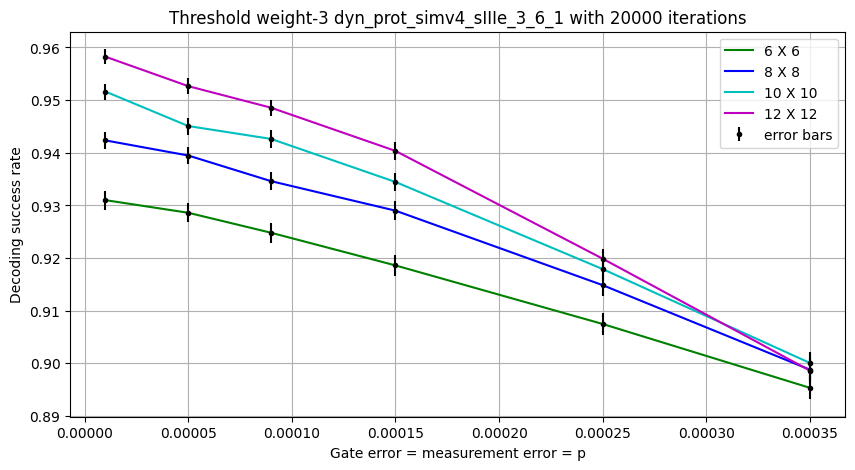

In [10]:
# prot_data = {"(6, 6)":{"0":[0.0005,0.8754],"1":[0.00065,0.8538],"2":[0.0008,0.8296],"3":[0.00095,0.8124],"4":[0.0011,0.7924]},"(8, 8)":{"0":[0.0005,0.8739],"1":[0.00065,0.8442],"2":[0.0008,0.81365],"3":[0.00095,0.79435],"4":[0.0011,0.74915]},"(10, 10)":{"0":[0.0005,0.86965],"1":[0.00065,0.8288],"2":[0.0008,0.79015],"3":[0.00095,0.76175],"4":[0.0011,0.72045]},"(12, 12)":{"0":[0.0005,0.8635],"1":[0.00065,0.809],"2":[0.0008,0.7642],"3":[0.00095,0.72545],"4":[0.0011,0.6673]}}
prot_data = {"(6, 6)":{"0":[0.00001,0.931],"1":[0.00005,0.9286],"2":[0.00009,0.9248],"3":[0.00015,0.9186],"4":[0.00025,0.907475],"5":[0.00035,0.89535]},"(8, 8)":{"0":[0.00001,0.94235],"1":[0.00005,0.939475],"2":[0.00009,0.9346],"3":[0.00015,0.929],"4":[0.00025,0.91485],"5":[0.00035,0.8988]},"(10, 10)":{"0":[0.00001,0.951625],"1":[0.00005,0.945075],"2":[0.00009,0.942625],"3":[0.00015,0.93445],"4":[0.00025,0.9179],"5":[0.00035,0.900075]},"(12, 12)":{"0":[0.00001,0.95825],"1":[0.00005,0.95265],"2":[0.00009,0.94855],"3":[0.00015,0.94035],"4":[0.00025,0.919875],"5":[0.00035,0.898625]}}
iters = 30000
prot_name = "dyn_prot_simv4_sIIIe_3_6_1"
plot(prot_data,iters,prot_name)

## dyn_prot_sim_v4_sIIIe_3_6_3

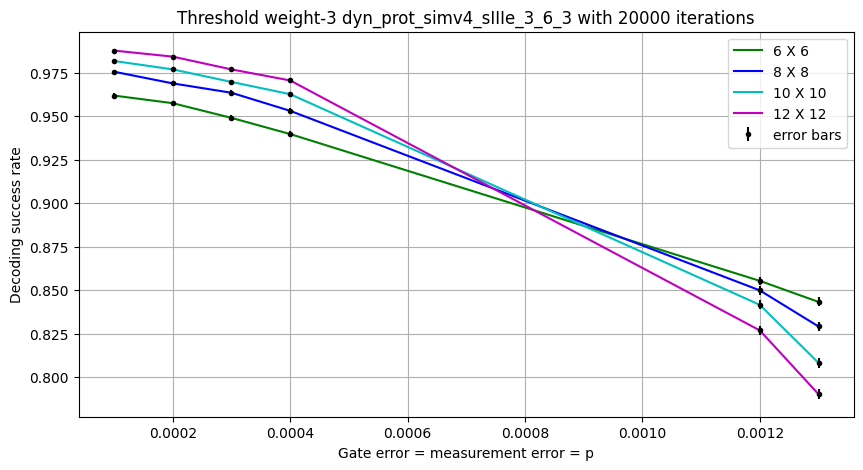

In [19]:
# prot_data = {"(6, 6)":{"0":[0.0005,0.9309],"1":[0.00065,0.9246],"2":[0.0008,0.90715],"3":[0.00095,0.8623],"4":[0.0011,0.8657]},"(8, 8)":{"0":[0.0005,0.94455],"1":[0.00065,0.93415],"2":[0.0008,0.91715],"3":[0.00095,0.8626],"4":[0.0011,0.8596]},"(10, 10)":{"0":[0.0005,0.95315],"1":[0.00065,0.94155],"2":[0.0008,0.92075],"3":[0.00095,0.8555],"4":[0.0011,0.8522]},"(12, 12)":{"0":[0.0005,0.95975],"1":[0.00065,0.94585],"2":[0.0008,0.92285],"3":[0.00095,0.8482],"4":[0.0011,0.83375]}}
prot_data = {"(6, 6)":{"0":[0.0001,0.961875],"1":[0.0002,0.9575],"2":[0.0003,0.94905],"3":[0.0004,0.93975],"4":[0.0012,0.855325],"5":[0.0013,0.843225]},"(8, 8)":{"0":[0.0001,0.9756],"1":[0.0002,0.968875],"2":[0.0003,0.9635],"3":[0.0004,0.9531],"4":[0.0012,0.84985],"5":[0.0013,0.8291]},"(10, 10)":{"0":[0.0001,0.981775],"1":[0.0002,0.976925],"2":[0.0003,0.969725],"3":[0.0004,0.962675],"4":[0.0012,0.841525],"5":[0.0013,0.80815]},"(12, 12)":{"0":[0.0001,0.98775],"1":[0.0002,0.984275],"2":[0.0003,0.976925],"3":[0.0004,0.970575],"4":[0.0012,0.826825],"5":[0.0013,0.79015]}}
iters = 30000
prot_name = "dyn_prot_simv4_sIIIe_3_6_3"
plot(prot_data,iters,prot_name)

## dyn_prot_simv4_sIIIe_3_7_1

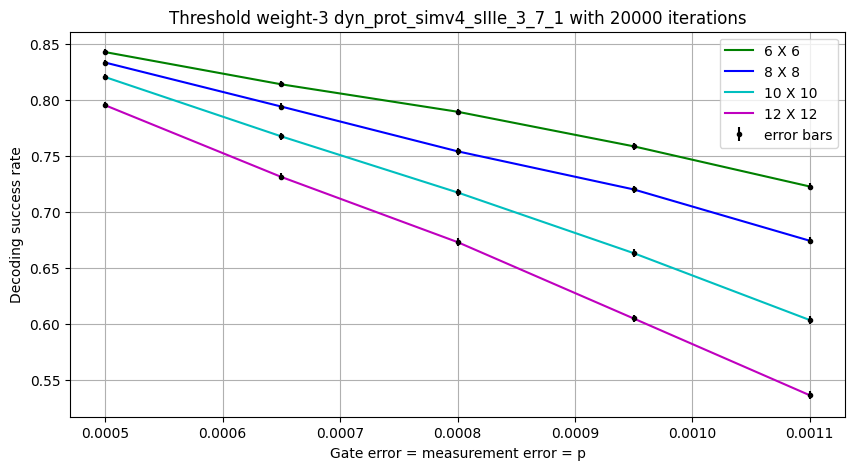

In [22]:
prot_data = {"(6, 6)":{"0":[0.0005,0.84275],"1":[0.00065,0.814],"2":[0.0008,0.78955],"3":[0.00095,0.7587],"4":[0.0011,0.72285]},"(8, 8)":{"0":[0.0005,0.8334],"1":[0.00065,0.79415],"2":[0.0008,0.75425],"3":[0.00095,0.72025],"4":[0.0011,0.67445]},"(10, 10)":{"0":[0.0005,0.82045],"1":[0.00065,0.76755],"2":[0.0008,0.71755],"3":[0.00095,0.6634],"4":[0.0011,0.6037]},"(12, 12)":{"0":[0.0005,0.7953],"1":[0.00065,0.73135],"2":[0.0008,0.67325],"3":[0.00095,0.6051],"4":[0.0011,0.5366]}}
iters = 20000
prot_name = "dyn_prot_simv4_sIIIe_3_7_1"
plot(prot_data,iters,prot_name)

## dyn_prot_simv4_sIIIe_3_7_9

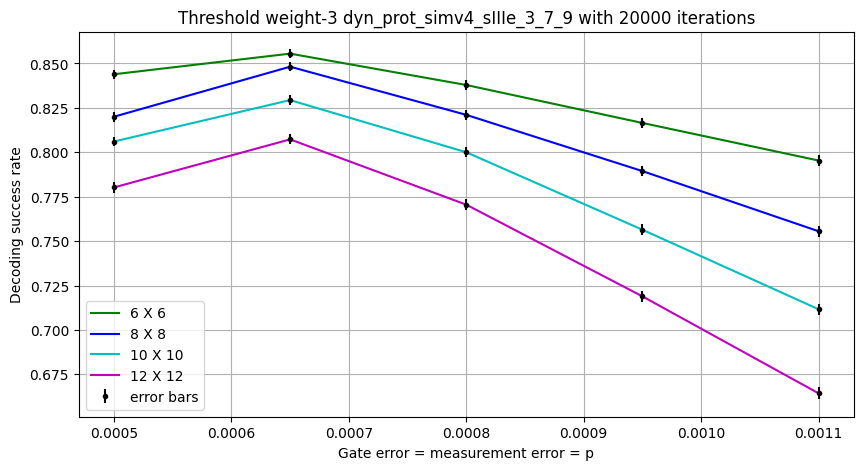

In [18]:
prot_data = {"(6, 6)":{"0":[0.0005,0.8439],"1":[0.00065,0.8555],"2":[0.0008,0.83785],"3":[0.00095,0.8165],"4":[0.0011,0.79535]},"(8, 8)":{"0":[0.0005,0.82],"1":[0.00065,0.84815],"2":[0.0008,0.82105],"3":[0.00095,0.7894],"4":[0.0011,0.75555]},"(10, 10)":{"0":[0.0005,0.80605],"1":[0.00065,0.82935],"2":[0.0008,0.8],"3":[0.00095,0.7564],"4":[0.0011,0.71165]},"(12, 12)":{"0":[0.0005,0.7802],"1":[0.00065,0.80725],"2":[0.0008,0.7705],"3":[0.00095,0.7189],"4":[0.0011,0.66435]}}
iters = 20000
prot_name = "dyn_prot_simv4_sIIIe_3_7_9"
plot(prot_data,iters,prot_name)

## dyn_prot_simv4_sIIIe_3_8_1

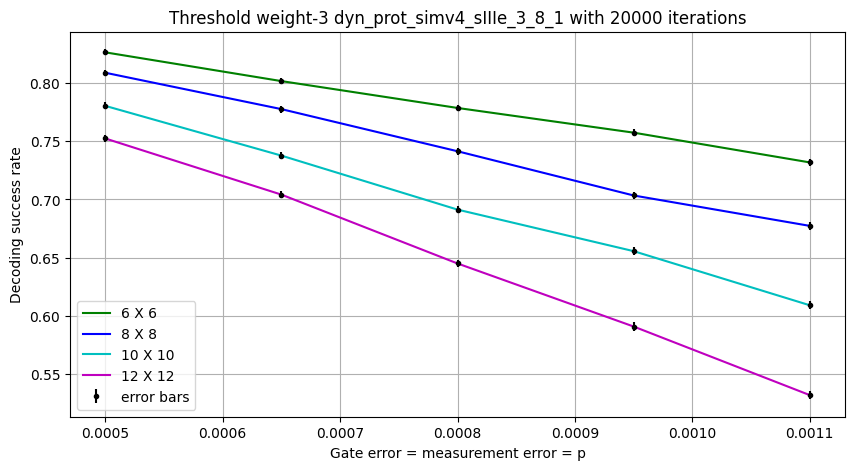

In [19]:
prot_data = {"(6, 6)":{"0":[0.0005,0.82655],"1":[0.00065,0.8018],"2":[0.0008,0.7787],"3":[0.00095,0.75745],"4":[0.0011,0.73185]},"(8, 8)":{"0":[0.0005,0.809],"1":[0.00065,0.7777],"2":[0.0008,0.74145],"3":[0.00095,0.7034],"4":[0.0011,0.67725]},"(10, 10)":{"0":[0.0005,0.7805],"1":[0.00065,0.7377],"2":[0.0008,0.69125],"3":[0.00095,0.6555],"4":[0.0011,0.60895]},"(12, 12)":{"0":[0.0005,0.75245],"1":[0.00065,0.70415],"2":[0.0008,0.6449],"3":[0.00095,0.59065],"4":[0.0011,0.53165]}}
iters = 20000
prot_name = "dyn_prot_simv4_sIIIe_3_8_1"
plot(prot_data,iters,prot_name)

## dyn_prot_simv4_sIIIe_3_9_1

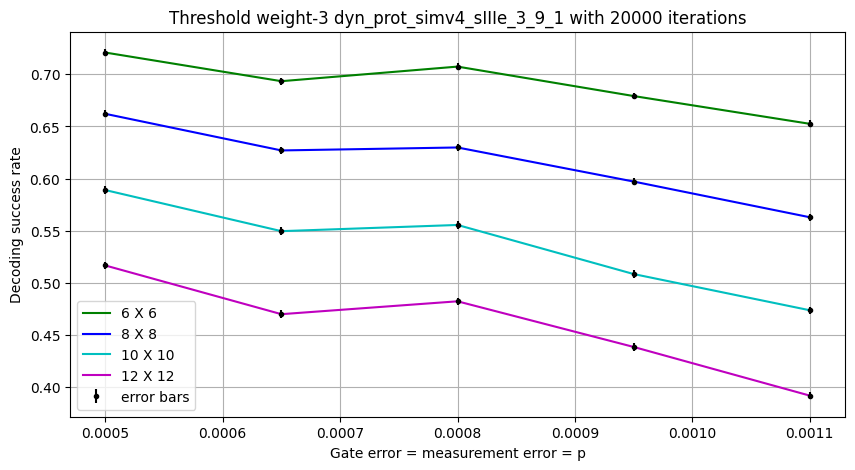

In [20]:
prot_data = {"(6, 6)":{"0":[0.0005,0.7209],"1":[0.00065,0.6934],"2":[0.0008,0.7074],"3":[0.00095,0.67915],"4":[0.0011,0.6525]},"(8, 8)":{"0":[0.0005,0.6621],"1":[0.00065,0.62695],"2":[0.0008,0.6298],"3":[0.00095,0.5971],"4":[0.0011,0.56285]},"(10, 10)":{"0":[0.0005,0.58895],"1":[0.00065,0.5495],"2":[0.0008,0.55545],"3":[0.00095,0.50835],"4":[0.0011,0.4736]},"(12, 12)":{"0":[0.0005,0.5166],"1":[0.00065,0.46985],"2":[0.0008,0.4822],"3":[0.00095,0.4384],"4":[0.0011,0.3917]}}
iters = 20000
prot_name = "dyn_prot_simv4_sIIIe_3_9_1"
plot(prot_data,iters,prot_name)

## dyn_prot_simv4_sIIIe_3_10_1

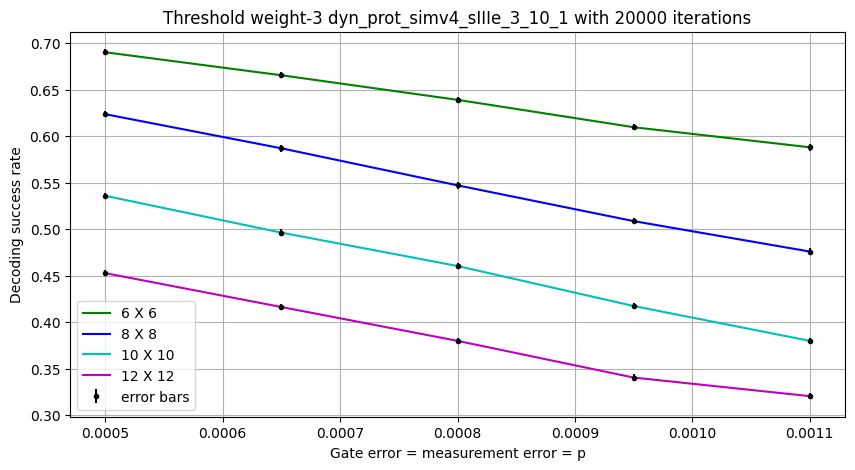

In [25]:
prot_data = {"(6, 6)":{"0":[0.0005,0.6904],"1":[0.00065,0.66565],"2":[0.0008,0.6392],"3":[0.00095,0.60975],"4":[0.0011,0.58815]},"(8, 8)":{"0":[0.0005,0.62375],"1":[0.00065,0.58705],"2":[0.0008,0.5472],"3":[0.00095,0.5087],"4":[0.0011,0.47595]},"(10, 10)":{"0":[0.0005,0.53595],"1":[0.00065,0.4963],"2":[0.0008,0.4604],"3":[0.00095,0.41735],"4":[0.0011,0.37985]},"(12, 12)":{"0":[0.0005,0.45275],"1":[0.00065,0.41625],"2":[0.0008,0.37985],"3":[0.00095,0.34035],"4":[0.0011,0.32035]}}
iters = 20000
prot_name = "dyn_prot_simv4_sIIIe_3_10_1"
plot(prot_data,iters,prot_name)

## dyn_prot_simv4_sIIIe_3_11_1

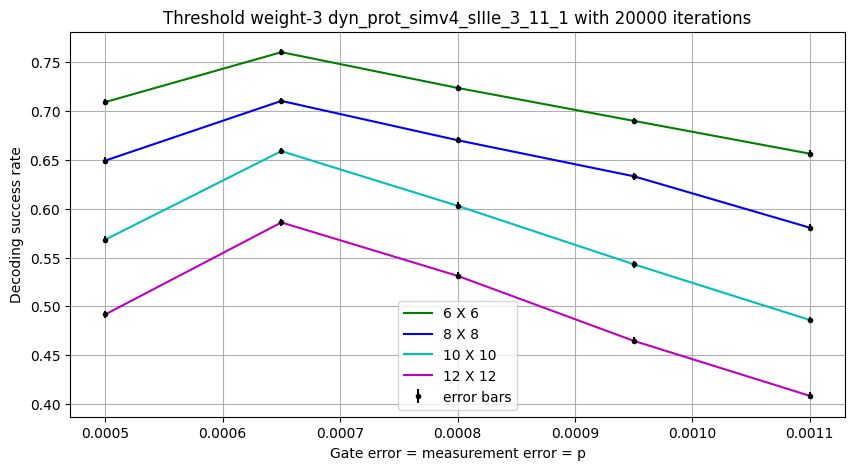

In [27]:
prot_data = {"(6, 6)":{"0":[0.0005,0.70925],"1":[0.00065,0.7604],"2":[0.0008,0.7238],"3":[0.00095,0.69005],"4":[0.0011,0.6564]},"(8, 8)":{"0":[0.0005,0.6493],"1":[0.00065,0.71045],"2":[0.0008,0.6702],"3":[0.00095,0.6333],"4":[0.0011,0.5806]},"(10, 10)":{"0":[0.0005,0.5683],"1":[0.00065,0.659],"2":[0.0008,0.603],"3":[0.00095,0.5431],"4":[0.0011,0.486]},"(12, 12)":{"0":[0.0005,0.4917],"1":[0.00065,0.58595],"2":[0.0008,0.53125],"3":[0.00095,0.46465],"4":[0.0011,0.4083]}}
iters = 20000
prot_name = "dyn_prot_simv4_sIIIe_3_11_1"
plot(prot_data,iters,prot_name)

## dyn_prot_simv4_sIIIe_3_11_8

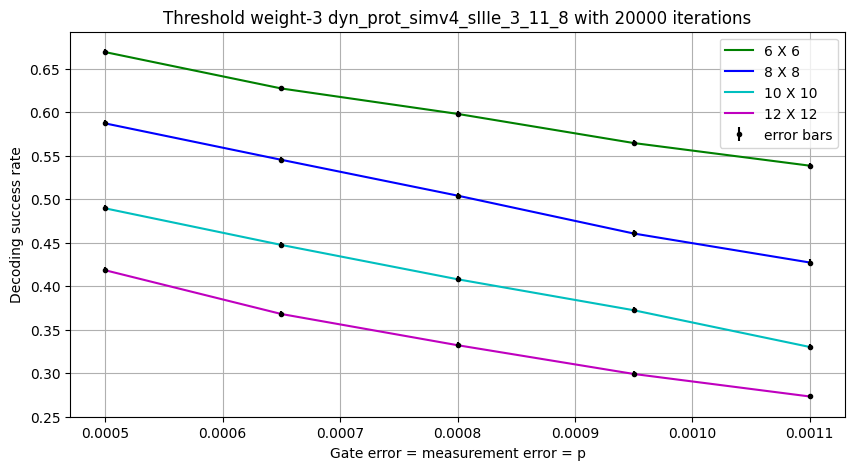

In [28]:
prot_data = {"(6, 6)":{"0":[0.0005,0.66895],"1":[0.00065,0.62715],"2":[0.0008,0.59795],"3":[0.00095,0.56445],"4":[0.0011,0.5384]},"(8, 8)":{"0":[0.0005,0.587],"1":[0.00065,0.54515],"2":[0.0008,0.504],"3":[0.00095,0.46045],"4":[0.0011,0.4271]},"(10, 10)":{"0":[0.0005,0.48935],"1":[0.00065,0.4473],"2":[0.0008,0.40785],"3":[0.00095,0.37225],"4":[0.0011,0.33]},"(12, 12)":{"0":[0.0005,0.4182],"1":[0.00065,0.3679],"2":[0.0008,0.33205],"3":[0.00095,0.299],"4":[0.0011,0.2731]}}
iters = 20000
prot_name = "dyn_prot_simv4_sIIIe_3_11_8"
plot(prot_data,iters,prot_name)

## dyn_prot_simv4_sIIIe_3_11_9

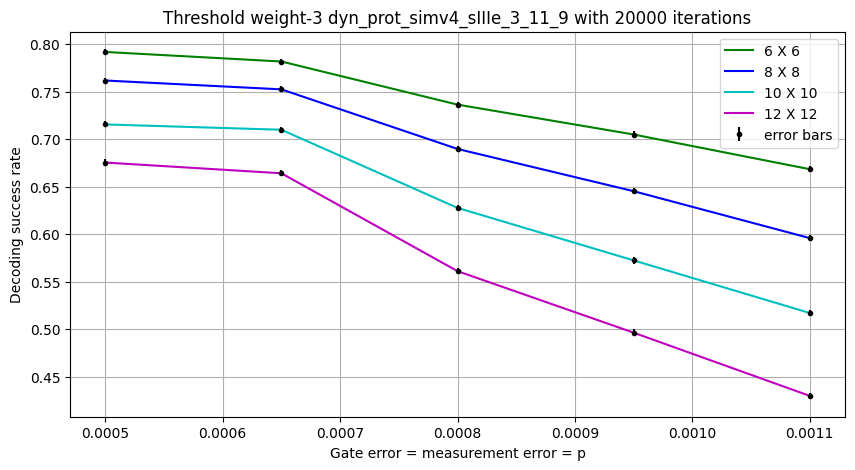

In [29]:
prot_data = {"(6, 6)":{"0":[0.0005,0.7918],"1":[0.00065,0.78175],"2":[0.0008,0.7364],"3":[0.00095,0.70495],"4":[0.0011,0.66845]},"(8, 8)":{"0":[0.0005,0.76175],"1":[0.00065,0.75245],"2":[0.0008,0.68975],"3":[0.00095,0.6453],"4":[0.0011,0.59595]},"(10, 10)":{"0":[0.0005,0.71555],"1":[0.00065,0.70995],"2":[0.0008,0.62775],"3":[0.00095,0.5725],"4":[0.0011,0.51715]},"(12, 12)":{"0":[0.0005,0.67545],"1":[0.00065,0.66415],"2":[0.0008,0.5612],"3":[0.00095,0.49645],"4":[0.0011,0.42995]}}
iters = 20000
prot_name = "dyn_prot_simv4_sIIIe_3_11_9"
plot(prot_data,iters,prot_name)

## dyn_prot_simv4_sIIIe_3_12_1

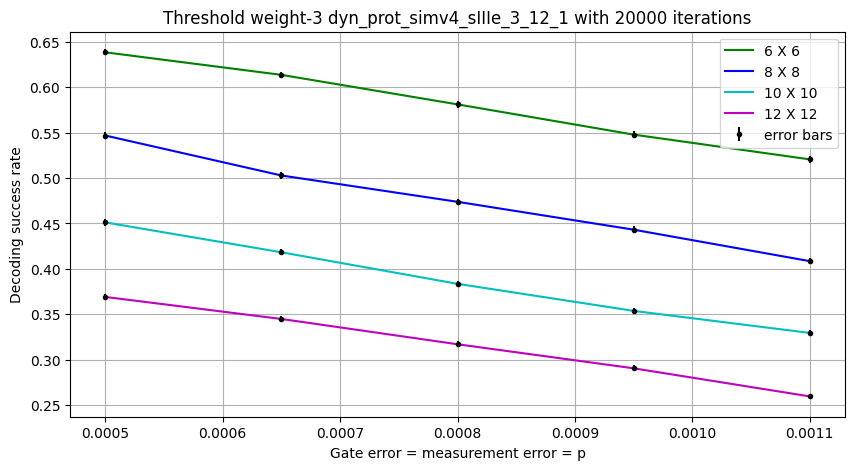

In [30]:
prot_data = {"(6, 6)":{"0":[0.0005,0.6382],"1":[0.00065,0.6134],"2":[0.0008,0.58095],"3":[0.00095,0.5477],"4":[0.0011,0.52045]},"(8, 8)":{"0":[0.0005,0.5467],"1":[0.00065,0.50275],"2":[0.0008,0.4738],"3":[0.00095,0.44315],"4":[0.0011,0.40855]},"(10, 10)":{"0":[0.0005,0.45115],"1":[0.00065,0.4183],"2":[0.0008,0.3836],"3":[0.00095,0.35385],"4":[0.0011,0.3296]},"(12, 12)":{"0":[0.0005,0.3692],"1":[0.00065,0.34495],"2":[0.0008,0.31715],"3":[0.00095,0.2907],"4":[0.0011,0.2598]}}
iters = 20000
prot_name = "dyn_prot_simv4_sIIIe_3_12_1"
plot(prot_data,iters,prot_name)